<a href="https://www.kaggle.com/code/nayanack/orange-quality-analysis?scriptVersionId=175377929&cellId=2" target="_blank">
  <img src="https://agro.estadao.com.br/app/uploads/2025/01/AdobeStock_279606999-scaled.jpeg" style="width: 100%; margin: 0; display: block; height: 65%">
</a>


# Qualidade das laranjas

## Equipe 1



*   Andre Pessoa (andre.pessoa92@hotmail.com)
*   Carlos Augusto (carlosaugustoestudante1202@gmail.com)
*   Pedro Luis (gilbonett@gmail.com)
*   Welington Júlio (welington.julio.rodrigues@gmail.com)
*   Juan Araújo (juan.araujo@ufms.br)
*   Erivelton Sousa (eriveltonsousa32@gmail.com)




## Importação das bibliotecas

In [ ]:
import pandas as pd
from IPython.display import Markdown
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import chi2_contingency
from itertools import combinations
import math
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set_style("whitegrid")

## Leitura dos dados

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/orange_quality.csv")

## Exibição dos dados e verificação de dados faltantes

In [ ]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [ ]:
linhas, colunas = df.shape

print(f"- {linhas} qtd de linhas")
print(f"- {colunas} qtd de colunas")

- 241 qtd de linhas
- 11 qtd de colunas


In [ ]:
df.isnull().sum()

,0
Size (cm),0
Weight (g),0
Brix (Sweetness),0
pH (Acidity),0
Softness (1-5),0
HarvestTime (days),0
Ripeness (1-5),0
Color,0
Variety,0
Blemishes (Y/N),0


## Dicionário de dados

---
- Columns:
-- Size: Size of orange in cm
-- Weight: Weight of orange in g
-- Brix: Sweetness level in Brix
-- pH: Acidity level (pH)
-- Softness: Softness rating (1-5)
-- HarvestTime: Days since harvest
-- Ripeness: Ripeness rating (1-5)
-- Color: Fruit color
-- Variety: Orange variety
-- Blemishes: Presence of blemishes (Yes/No)
-- Quality: Overall quality rating (1-5)
---

---
A partir das informações iniciais, podemos dizer que:
 - O conjunto de dados tem 244 unidades amostrais com 7 variáveis
 - Classificação das variáveis:
    - Quantitativa contínua: `Size`, `Weight`
    - Quantitativa discreta: `Brix`, `pH`, `HarvestTime`
    - Qualitativa nominal: `Color`, `Variety`, `Blemishes`
    - Qualitativa ordinal: `Softness`, `Ripeness`, `Quality`
---

In [ ]:
df_dic = pd.DataFrame([
	{
		"variavel": "Size (cm)",
		"descrição": "Tamanho em cm.",
		"tipo": "quantitativa",
		"subtipo": "contínua"
	},
	{
		"variavel": "Weight (g)",
		"descrição": "Peso em gramas.",
		"tipo": "quantitativa",
		"subtipo": "contínua"
	},
	{
		"variavel": "Brix (Sweetness)",
		"descrição": "Quantidade de gramas de açúcar em 100 gramas de solução. ",
		"tipo": "quantitativa",
		"subtipo": "discreta"
	},
	{
		"variavel": "pH (Acidity)",
		"descrição": "Nível de pH.",
		"tipo": "quantitativa",
		"subtipo": "discreta"
	},
	{
		"variavel": "HarvestTime (days)",
		"descrição": "Tempo, em dias, da colheita.",
		"tipo": "quantitativa",
		"subtipo": "discreto"
	},
	{
		"variavel": "Color",
		"descrição": "Cor da fruta.",
		"tipo": "qualitativo",
		"subtipo": "nominal"
	},
	{
		"variavel": "Variety",
		"descrição": "Variedade da fruta.",
		"tipo": "qualitativo",
		"subtipo": "nominal"
	},
	{
		"variavel": "Blemishes (Y/N)",
		"descrição": "Presença de defeitos na laranja (Yes/No)",
		"tipo": "qualitativo",
		"subtipo": "nominal"
	},
	{
		"variavel": "Softness (1-5)",
		"descrição": "Nivel de maciez da fruta. (1-5) ",
		"tipo": "qualitativo",
		"subtipo": "ordinal"
	},
	{
		"variavel": "Ripeness (1-5)",
		"descrição": "Indica o nível de maturação da fruta. (1-5)",
		"tipo": "qualitativo",
		"subtipo": "ordinal"
	},
  {
		"variavel": "Quality (1-5)",
		"descrição": "Indica o nivel de qualidade da fruta. (1-5)",
		"tipo": "qualitativo",
		"subtipo": "ordinal"
	},
])
df_dic

,variavel,descrição,tipo,subtipo
0,Size (cm),Tamanho em cm.,quantitativa,contínua
1,Weight (g),Peso em gramas.,quantitativa,contínua
2,Brix (Sweetness),Quantidade de gramas de açúcar em 100 gramas d...,quantitativa,discreta
3,pH (Acidity),Nível de pH.,quantitativa,discreta
4,HarvestTime (days),"Tempo, em dias, da colheita.",quantitativa,discreto
5,Color,Cor da fruta.,qualitativo,nominal
6,Variety,Variedade da fruta.,qualitativo,nominal
7,Blemishes (Y/N),Presença de defeitos na laranja (Yes/No),qualitativo,nominal
8,Softness (1-5),Nivel de maciez da fruta. (1-5),qualitativo,ordinal
9,Ripeness (1-5),Indica o nível de maturação da fruta. (1-5),qualitativo,ordinal


In [ ]:
# @title Resumo estatístico

display(Markdown("### Variáveis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

              Color    Variety Blemishes (Y/N)
count           241        241             241
unique            5         24              12
top     Deep Orange  Cara Cara               N
freq             75         21             149


### Variáveis quantitativas

        Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
count  241.000000  241.000000        241.000000    241.000000      241.000000   
mean     7.844813  205.128631         10.907884      3.473900        3.072614   
std      1.086002   56.461012          2.760446      0.421007        1.323630   
min      6.000000  100.000000          5.500000      2.800000        1.000000   
25%      6.900000  155.000000          8.500000      3.200000        2.000000   
50%      7.800000  205.000000         11.000000      3.400000        3.000000   
75%      8.700000  252.000000         13.400000      3.800000        4.000000   
max     10.000000  300.000000         16.000000      4.400000        5.000000   

       HarvestTime (days)  Ripeness (1-5)  Quality (1-5)  
count          241.000000      241.000000     241.000000  
mean            15.344398        3.599585       3.817427  
std              5.323852        1.205214       1.014410  
min              4.000000        1

---
- `Deep Orange` é a cor mais comum e `Cara Cara` é a variedade mais presente.
- Mais da metade das maçãs não possui qualquer tipo de defeito (`blemishes`).
- As laranjas possuem um tamanho médio de `7,8cm` e um peso médio de `205g`.
- Os índices médios para as características das laranjas são:  
     `Doçuca(Brix): 10.90`, `Acidez(pH): 3.47` e `Maciez(Softness): 3.07`.
- O tempo médio de colheita é de `15 dias`.
- A escala média de maturação é `3.6` e de qualidade é `3.8`.
---

## Análise univariada


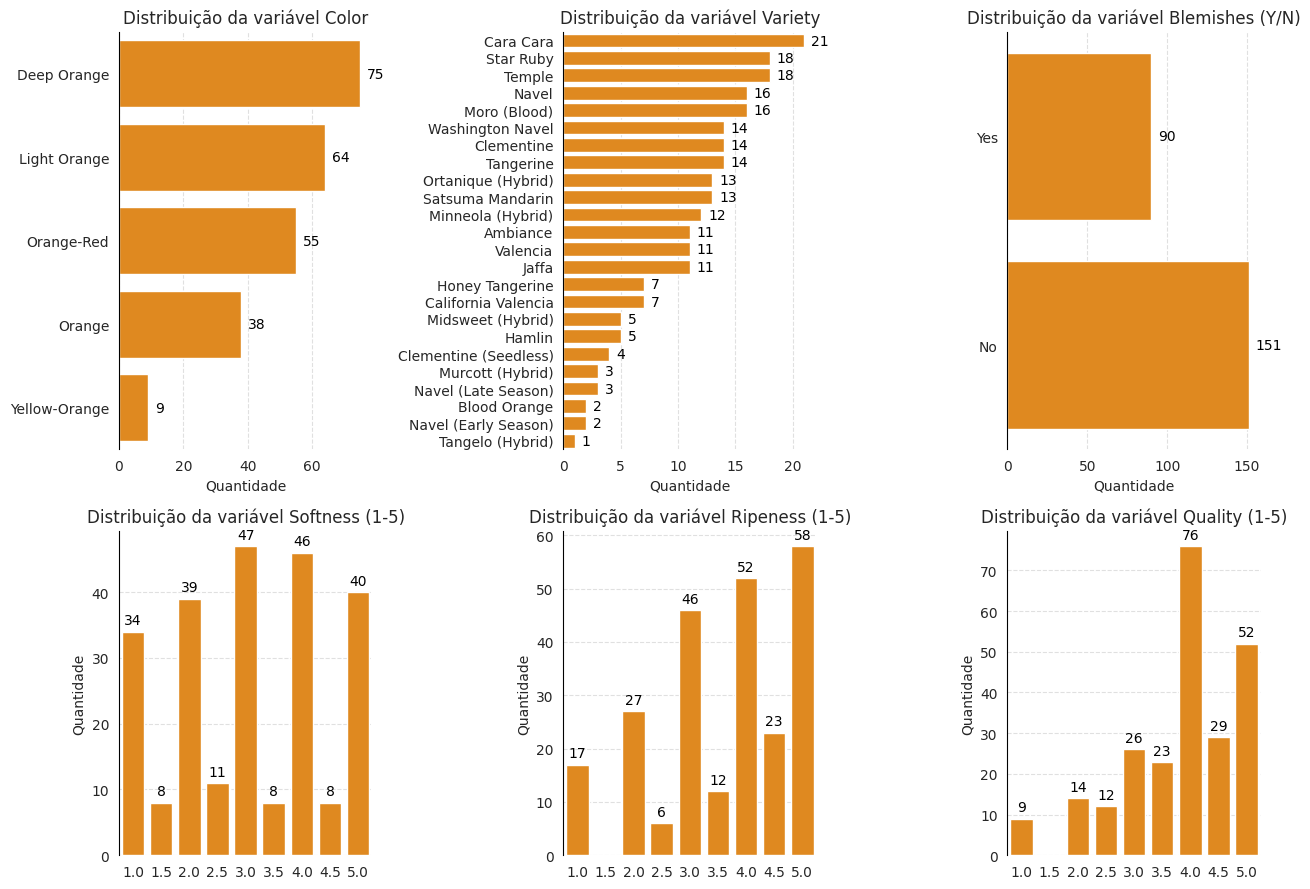

In [ ]:
# @title Variáveis qualitativas
variaveis_qualitativas = df_dic.query("tipo == 'qualitativo'").variavel.to_list()

fig, axes = plt.subplots(figsize=(13, 9), ncols=3, nrows=2, gridspec_kw={'height_ratios': [0.9,0.7]})
axes = axes.flatten()
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].astype(str)
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].str[0].str.upper()
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].replace({'Y': 'Yes', 'N': 'No'})

for i, variavel in enumerate(variaveis_qualitativas):
  ax = axes[i]
  plot_vertical = False

  if variavel in ["Softness (1-5)", "Ripeness (1-5)", "Quality (1-5)"]:
      plot_vertical = True
      order = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
  elif variavel == "Blemishes (Y/N)":
      order = ["Yes", "No"]
  else:
      order = df[variavel].value_counts().index
      plot_vertical = False

  if plot_vertical:
      sns.countplot(data=df, x=variavel, ax=ax, order=order, alpha=1, color="darkorange")
      if ax.containers:
        ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=3)
      ax.set(title=f"Distribuição da variável {variavel}", ylabel="Quantidade", xlabel="")

  else:
      sns.countplot(data=df, y=variavel, ax=ax, order=order, alpha=1, color="darkorange")
      if ax.containers:
        ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5)
      ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade", ylabel="")

  grid_axis = 'y' if plot_vertical else 'x'
  ax.grid(axis=grid_axis, linestyle='--', alpha=0.7, color='lightgray')
  ax.set_axisbelow(True)
  for side in ["bottom", "top", "right"]:
      ax.spines[side].set_visible(False)
  ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()


---

- A cor mais frequente é `Deep Orange` (75 laranjas), seguida por `Light Orange` (64) e `Orange-Red` (55).
- A variedade mais comum é `Cara Cara` (21 laranjas), seguida por `Star Ruby` (18) e `Temple` (18).
- A maioria das laranjas não apresenta defeitos (149 laranjas), enquanto 23 laranjas apresentam defeitos.
- A maciez mais frequente é `3.0` (47 laranjas), seguida por `4.0` (46) e `5.0` (40).
- A maturação mais frequente é `5.0` (58 laranjas), seguida por `4.0` (52) e `3.0` (46).
- O valor na escala de qualidade mais frequente é `4.0` (76 laranjas), seguida por `5.0` (52) e `4.5` (29).

---

### Variáveis Quantitativas

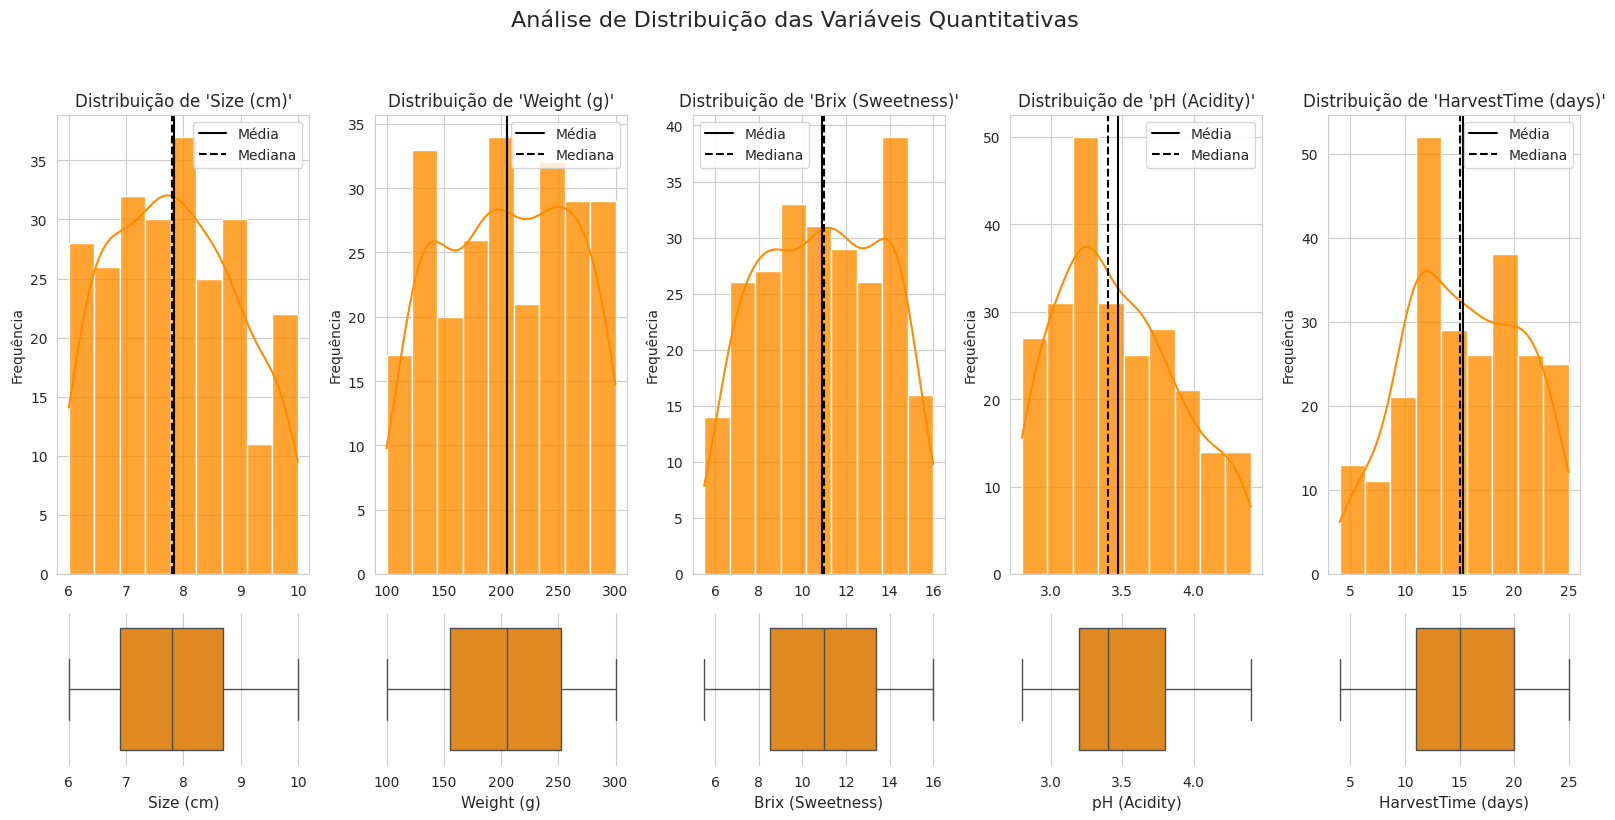

In [ ]:
variaveis_quantitativas = df_dic.query("tipo == 'quantitativa'").variavel.to_list()

fig, axes = plt.subplots(figsize=(16, 8), ncols=5, nrows=2, gridspec_kw={"height_ratios": [3, 1]})

for i, variavel in enumerate(variaveis_quantitativas):
    ax_hist = axes[0, i]
    sns.histplot(data=df, x=variavel, ax=ax_hist, alpha=0.8, kde=True, color="darkorange")
    ax_hist.axvline(df[variavel].mean(), color='black', linestyle="-", label="Média")
    ax_hist.axvline(df[variavel].median(), color='black', linestyle="--", label="Mediana")
    ax_hist.set_title(f"Distribuição de '{variavel}'", fontsize=12)
    ax_hist.set_xlabel("")
    ax_hist.set_ylabel("Frequência")
    ax_hist.legend()
    ax_box = axes[1, i]
    sns.boxplot(data=df, x=variavel, ax=ax_box, color="darkorange")
    for side in ["left", "right", "top", "bottom"]:
        ax_box.spines[side].set_visible(False)
    ax_box.set_yticks([])
    ax_box.set_ylabel("")
    ax_box.set_xlabel(variavel, fontsize=11)
fig.suptitle("Análise de Distribuição das Variáveis Quantitativas", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


---

- A distribuição do tamanho (`Size`) das laranjas é bastante simétrica e semelhante a uma curva normal. A maior concentração de frutas ocorre com um tamanho em torno de 8.0 cm.
- O peso (`Weight`) também exibe uma distribuição aproximadamente normal e simétrica, com a maior frequência de laranjas concentrada na faixa de 200 a 225 g.
- A distribuição da doçura (`Brix`) é a mais consistente e simétrica de todas as variáveis. O pico de frequência é bem definido em torno de 12.0 a 12.5 Brix, com a média e a mediana quase idênticas.
- Diferente das anteriores, a acidez (`ph (Acidity)`) mostra uma clara assimetria à direita (positiva). A maioria das laranjas possui um pH mais baixo (mais ácido), com o pico de frequência em torno de 3.2 a 3.4.
- O tempo de colheita (`HarvestTime`) apresenta uma assimetria à esquerda (negativa). A maior parte da colheita ocorre mais tarde, com a frequência mais alta entre 18 e 20 dias. A média é menor que a mediana, o que indica que valores de colheita mais baixos (mais precoces) influenciam a média geral.

---

### Dados faltantes

In [ ]:
df.isnull().sum()

,0
Size (cm),0
Weight (g),0
Brix (Sweetness),0
pH (Acidity),0
Softness (1-5),0
HarvestTime (days),0
Ripeness (1-5),0
Color,0
Variety,0
Blemishes (Y/N),0


---

Não existem dados faltantes

---

## Análise bivariada

### Relação entre variáveis quantitativas

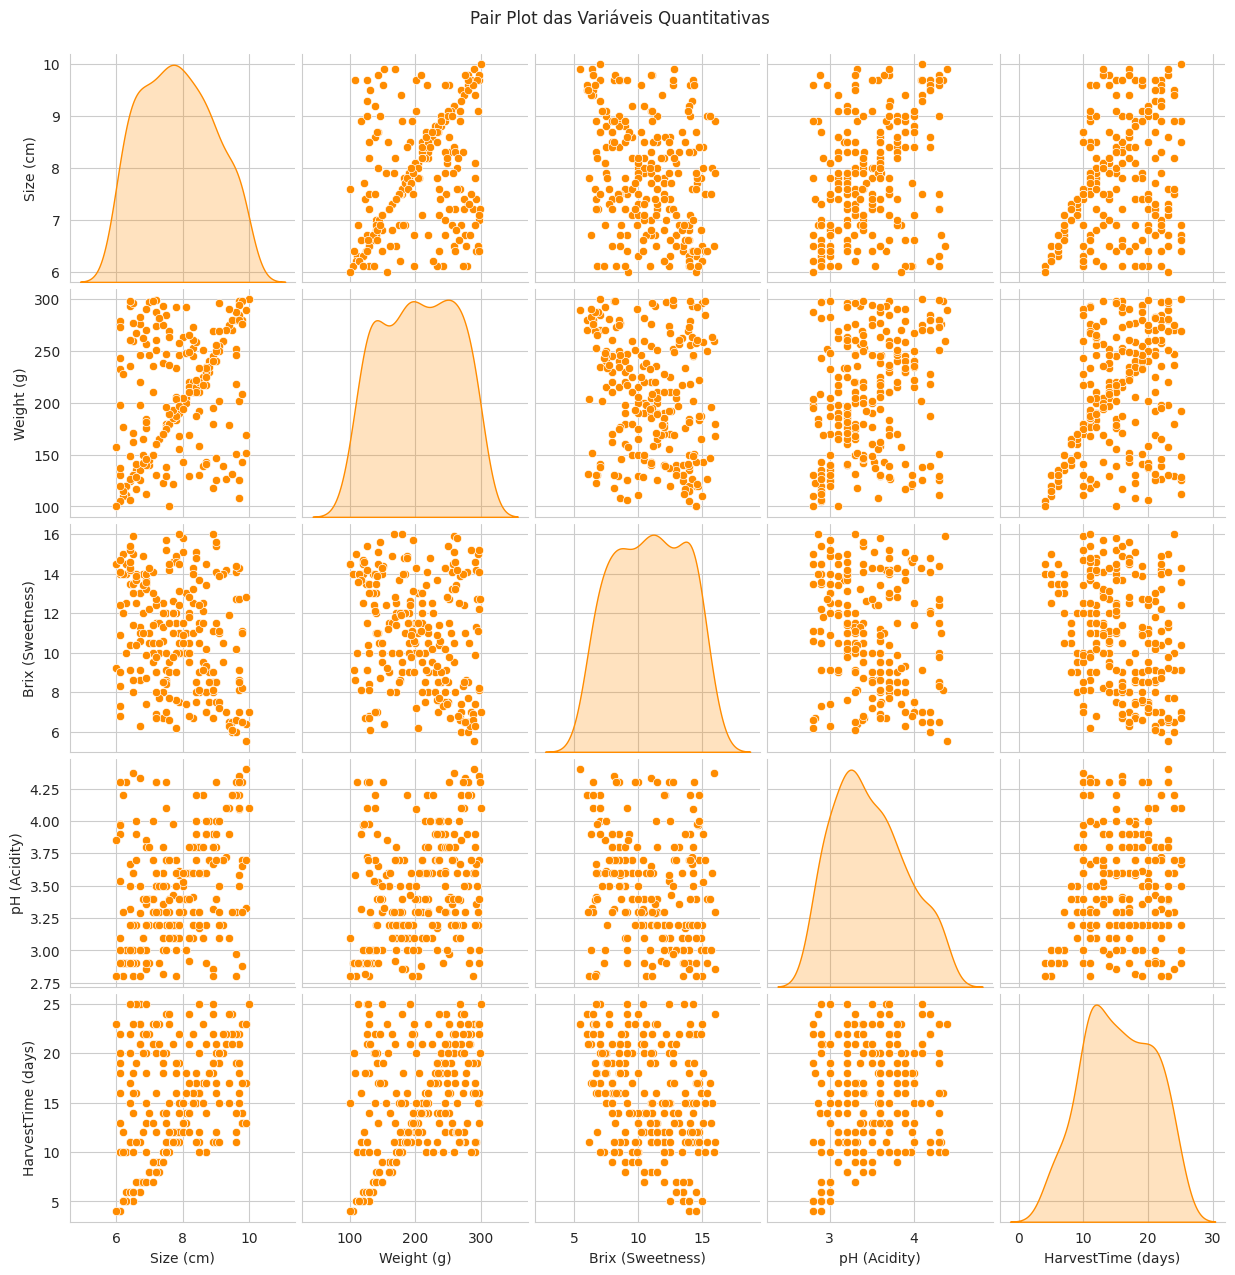

In [ ]:
# @title Pair Plot das Variáveis Quantitativas

sns.pairplot(df[variaveis_quantitativas], diag_kind='kde', plot_kws={'color': 'darkorange'}, diag_kws={'color': 'darkorange'})
plt.suptitle('Pair Plot das Variáveis Quantitativas', y=1.02)
plt.show()

---
- Observamos algumas relações entre as variáveis quantitativas, embora a maioria das correlações sejam de fracas a moderadas.
- Existe uma correlação positiva moderada entre `Size (cm)` e `Weight (g)`, indicando que laranjas maiores tendem a ser mais pesadas.
- `Brix (Sweetness)` apresenta correlações negativas fracas a moderadas com `Size (cm)`, `Weight (g)`, `pH (Acidity)` e `HarvestTime (days)`. Isso sugere que laranjas mais doces tendem a ser menores, mais leves, menos ácidas e colhidas mais cedo.
- `pH (Acidity)` tem correlações positivas fracas a moderadas com `Size (cm)`, `Weight (g)` e `HarvestTime (days)`, indicando que laranjas mais ácidas tendem a ser maiores, mais pesadas e colhidas mais tarde.
- `HarvestTime (days)` mostra correlações positivas fracas a moderadas com `Size (cm)`, `Weight (g)` e `pH (Acidity)`. Laranjas colhidas mais tarde tendem a ser maiores, mais pesadas e mais ácidas.
- Não há correlações lineares fortes evidentes entre a maioria dos pares de variáveis quantitativas, como pode ser visto no mapa de calor da correlação e nos gráficos de dispersão.
- Os gráficos de dispersão não mostram a presença de outliers extremos que se destaquem significativamente do padrão geral.
---

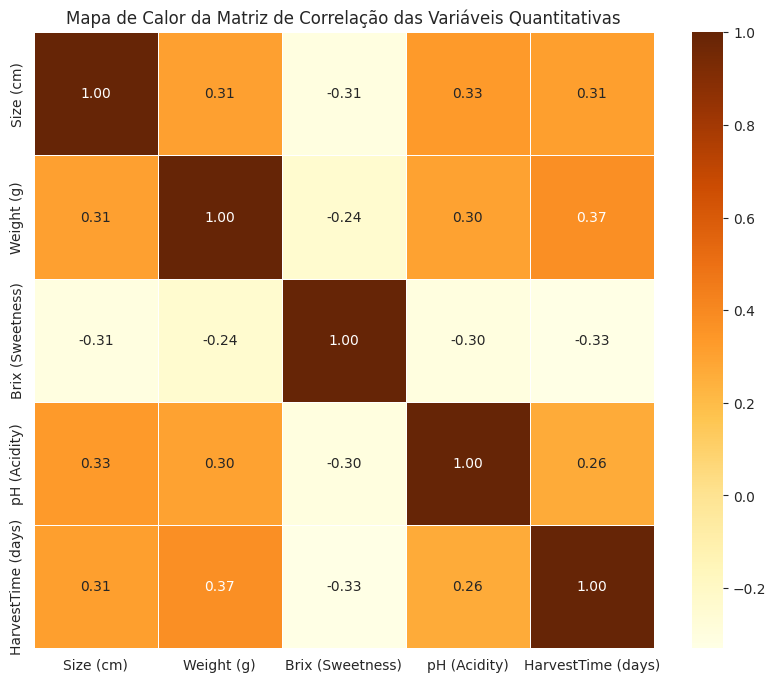

In [ ]:
# @title Mapa de calor da matriz de correlação

correlation_matrix = df[variaveis_quantitativas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação das Variáveis Quantitativas')
plt.show()

* * *

- A relação entre as correlações das variáveis quantitativas é:
`Corr(Brix (Sweetness), Quality (1-5))` (0.63) > `Corr(HarvestTime (days), Quality (1-5))` (-0.47) > `Corr(Weight (g), Quality (1-5))` (-0.33) > `Corr(pH (Acidity), Quality (1-5))` (-0.32) > `Corr(Softness (1-5), Quality (1-5))` (-0.30) > `Corr(Ripeness (1-5), Quality (1-5))` (0.28) > `Corr(Size (cm), Quality (1-5))` (-0.24).
- A doçura (`Brix`) é a variável que mais se correlaciona com a qualidade (`Quality`).
- O tempo de colheita (`HarvestTime`), o peso (`Weight`) e a acidez (`pH`) também apresentam correlações notáveis com a qualidade.

* * *

### Relação entre variáveis qualitativa

#### Separação das variáveis

In [ ]:
variaveis_qualit = df_dic[df_dic['tipo'] == 'qualitativo']['variavel'].tolist()
print("Variáveis Qualitativas:", variaveis_qualit)

Variáveis Qualitativas: ['Color', 'Variety', 'Blemishes (Y/N)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']


In [ ]:
ordinais = df_dic[(df_dic['tipo'] == 'qualitativo') & (df_dic['subtipo'] == 'ordinal')]['variavel'].tolist()
print("Variaveis Ordinais:", ordinais)

Variaveis Ordinais: ['Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']


In [ ]:
nominais = df_dic[(df_dic['tipo'] == 'qualitativo') & (df_dic['subtipo'] == 'nominal')]['variavel'].tolist()
print("Variaveis Nominais:", nominais)

Variaveis Nominais: ['Color', 'Variety', 'Blemishes (Y/N)']


#### Nominal vs Nominal

In [ ]:
tabela_variedade_manchas = pd.crosstab(index=df['Color'], columns=df['Variety'])
print(tabela_variedade_manchas)

Variety        Ambiance  Blood Orange  California Valencia  Cara Cara  \
Color                                                                   
Deep Orange           3             0                    3          2   
Light Orange          0             0                    0          5   
Orange                3             0                    4          1   
Orange-Red            5             2                    0         13   
Yellow-Orange         0             0                    0          0   

Variety        Clementine  Clementine (Seedless)  Hamlin  Honey Tangerine  \
Color                                                                       
Deep Orange             6                      0       1                0   
Light Orange            4                      4       0                3   
Orange                  3                      0       4                1   
Orange-Red              1                      0       0                3   
Yellow-Orange           0 

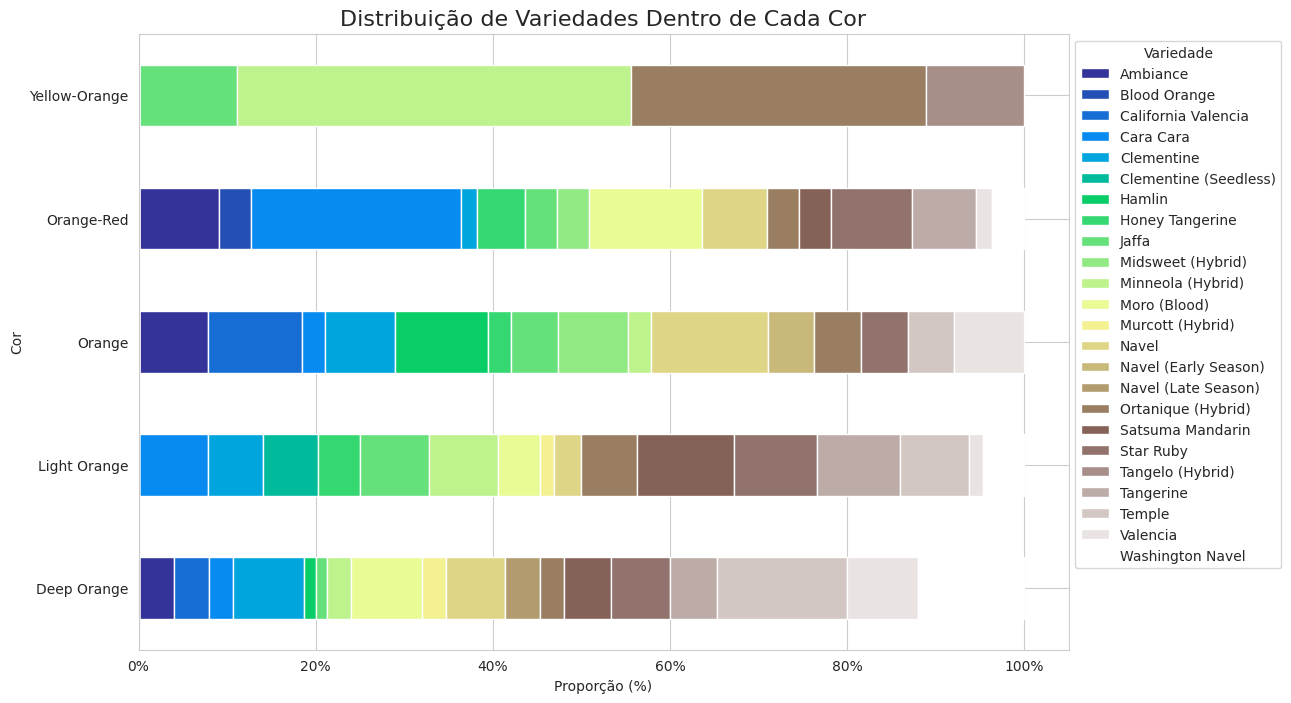

In [ ]:
crosstab_percent = tabela_variedade_manchas.div(
    tabela_variedade_manchas.sum(axis=1),
    axis=0
)

crosstab_percent.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='terrain'
)

plt.title('Distribuição de Variedades Dentro de Cada Cor', fontsize=16)
plt.xlabel('Proporção (%)')
plt.ylabel('Cor')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.legend(title='Variedade', bbox_to_anchor=(1.0, 1.0))
plt.show()

---
Distribuição de **Variedades** Dentro de Cada **Cor**

Este gráfico mostra a **composição de variedades dentro de cada grupo de cor**.

- A cor **"Orange-Red"** contém principalmente:
  - **Blood Orange**, **Cara Cara**, **Temple**, **Moro (Blood)** — variedades com **alta taxa de manchas**.

- A cor **"Yellow-Orange"** tem:
  - **Midsweet (Hybrid)** e **Jaffa** como principais — embora sejam amarelas, essas variedades **ainda têm alta taxa de manchas**.

A **composição varietal de cada cor explica a distribuição de manchas**.  
Frutas avermelhadas têm mais manchas não pela cor em si, mas pelas **variedades associadas a elas**.

---


In [ ]:
tabela_variedade_manchas_2 = pd.crosstab(index=df['Color'], columns=df['Blemishes (Y/N)'])
print(tabela_variedade_manchas_2)

Blemishes (Y/N)  No  Yes
Color                   
Deep Orange      44   31
Light Orange     44   20
Orange           27   11
Orange-Red       29   26
Yellow-Orange     7    2


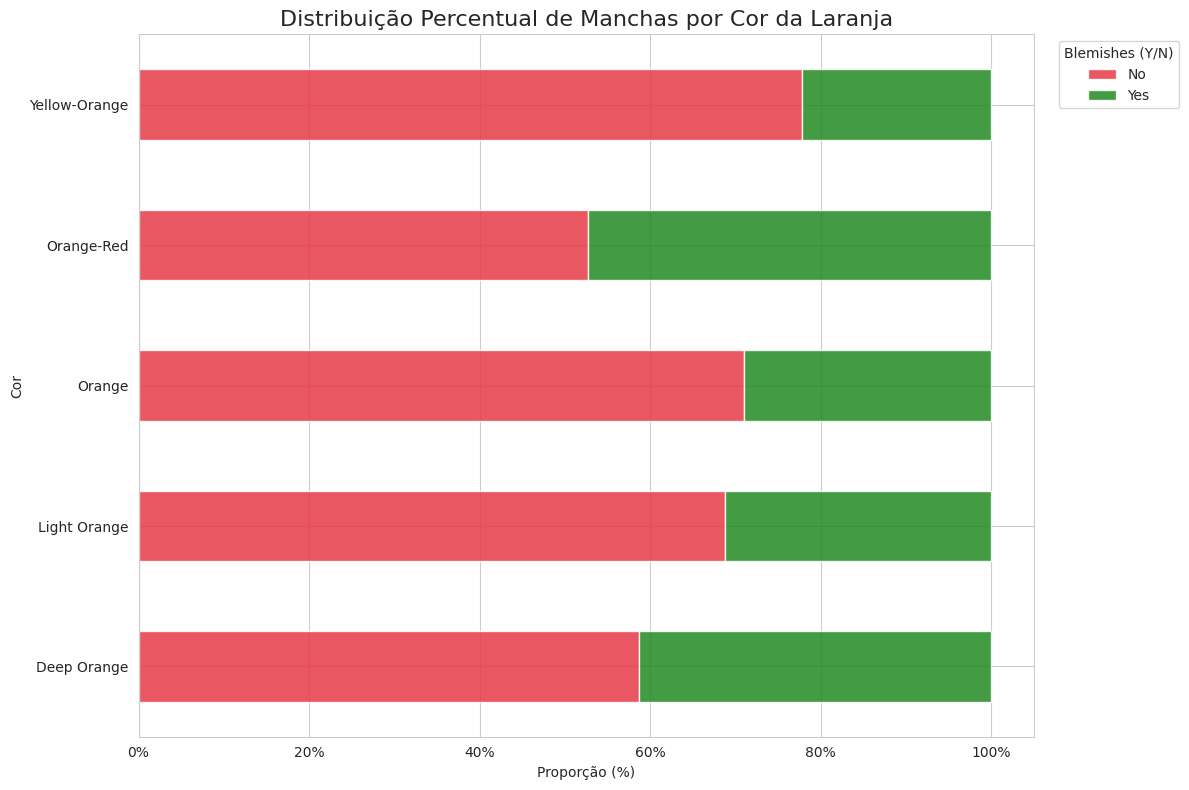

In [ ]:
tabela_cor_manchas = pd.crosstab(index=df['Color'], columns=df['Blemishes (Y/N)'])

crosstab_percent = tabela_cor_manchas.div(
    tabela_cor_manchas.sum(axis=1),
    axis=0
)

cores_mapeadas = {
    'Yes': '#228B22',
    'No': '#E63946'
}

ordem_colunas = crosstab_percent.columns
cores_ordenadas = [cores_mapeadas[col] for col in ordem_colunas]

crosstab_percent.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    color=cores_ordenadas,
    alpha=0.85
)

plt.title('Distribuição Percentual de Manchas por Cor da Laranja', fontsize=16)
plt.xlabel('Proporção (%)')
plt.ylabel('Cor')

legend_title = crosstab_percent.columns.name
plt.legend(title=legend_title, bbox_to_anchor=(1.02, 1.0), loc='upper left')

plt.gca().xaxis.set_major_formatter(FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()

---
Distribuição Percentual de Manchas por **Cor da Laranja**

Este gráfico mostra a distribuição de manchas com base na **cor da fruta**.

- **"Orange-Red"**: maior proporção de frutas com manchas (mais de 50% com `Yes`).
- **"Yellow-Orange"** e **"Orange"**: maior proporção de frutas **sem manchas**.

Cores mais avermelhadas estão associadas a **maior presença de manchas**, enquanto cores mais amareladas tendem a indicar frutas mais visualmente saudáveis.

---

In [ ]:
tabela_variedade_manchas_3 = pd.crosstab(index=df['Variety'], columns=df['Blemishes (Y/N)'])
print(tabela_variedade_manchas_3)

Blemishes (Y/N)        No  Yes
Variety                       
Ambiance                6    5
Blood Orange            2    0
California Valencia     7    0
Cara Cara               9   12
Clementine              8    6
Clementine (Seedless)   4    0
Hamlin                  4    1
Honey Tangerine         6    1
Jaffa                   4    7
Midsweet (Hybrid)       0    5
Minneola (Hybrid)       7    5
Moro (Blood)            9    7
Murcott (Hybrid)        3    0
Navel                  11    5
Navel (Early Season)    2    0
Navel (Late Season)     3    0
Ortanique (Hybrid)      9    4
Satsuma Mandarin        9    4
Star Ruby              11    7
Tangelo (Hybrid)        1    0
Tangerine               6    8
Temple                 12    6
Valencia                7    4
Washington Navel       11    3


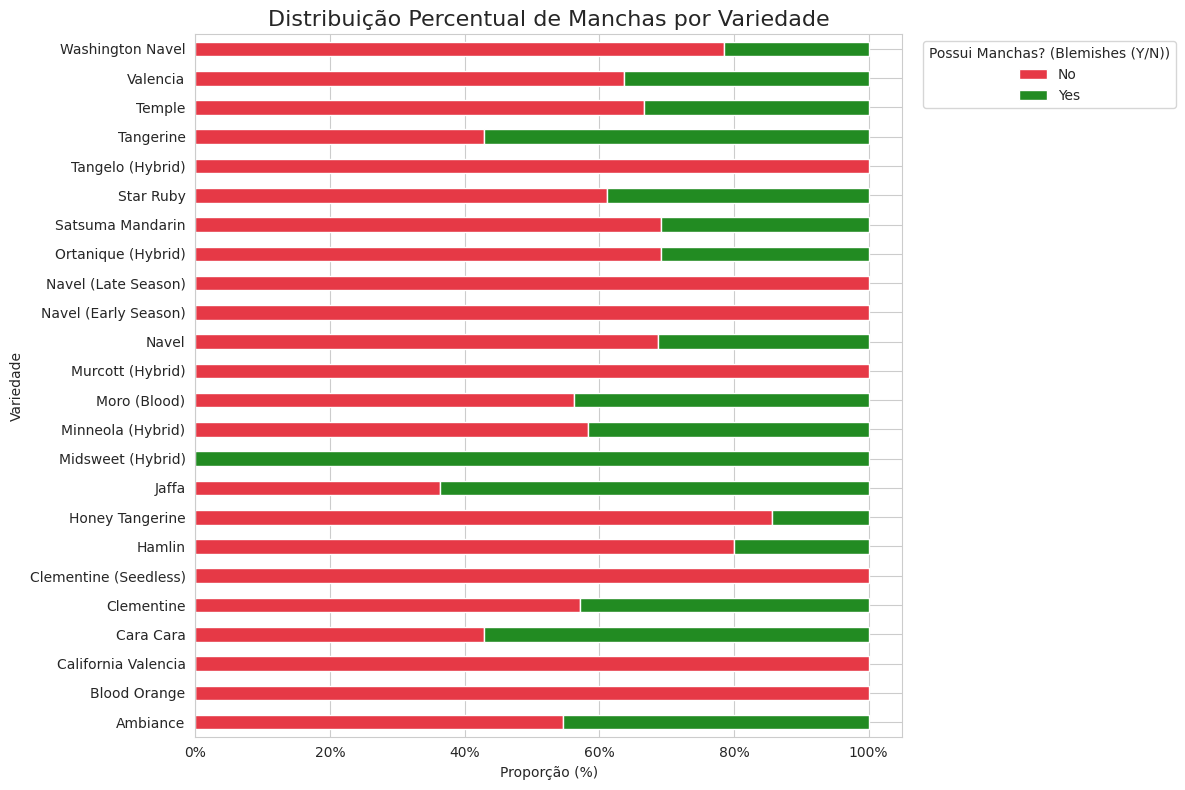

In [ ]:
tabela_variedade_manchas = pd.crosstab(index=df['Variety'], columns=df['Blemishes (Y/N)'])

crosstab_percent = tabela_variedade_manchas.div(
    tabela_variedade_manchas.sum(axis=1),
    axis=0
)

cores_mapeadas = {
    'Yes': '#228B22',
    'No': '#E63946'
}

ordem_colunas = crosstab_percent.columns
cores_ordenadas = [cores_mapeadas[col] for col in ordem_colunas]

crosstab_percent.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    color=cores_ordenadas
)

plt.title('Distribuição Percentual de Manchas por Variedade', fontsize=16)
plt.xlabel('Proporção (%)')
plt.ylabel('Variedade')

legend_title = crosstab_percent.columns.name
plt.legend(title=f'Possui Manchas? ({legend_title})', bbox_to_anchor=(1.02, 1.0), loc='upper left')

plt.gca().xaxis.set_major_formatter(FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()

---

Distribuição Percentual de Manchas por **Variedade**

Este gráfico mostra a proporção de frutas **com (`Yes`) e sem (`No`) manchas** para cada variedade.

- Variedades com **maior proporção de frutas com manchas**:
  - **Midsweet (Hybrid)**, **Minneola (Hybrid)**, **Jaffa**, **California Valencia** (quase 100% com manchas).

- Variedades com **menor incidência de manchas**:
  - **Washington Navel**, **Valencia**, **Temple**, **Clementine**, **Murcott (Hybrid)**, **Hamlin** (mais equilibradas ou com predominância de frutas sem manchas).

A **variedade tem forte influência** na presença de defeitos visuais (manchas) nas frutas.

---

#### Nominal vs Ordinal

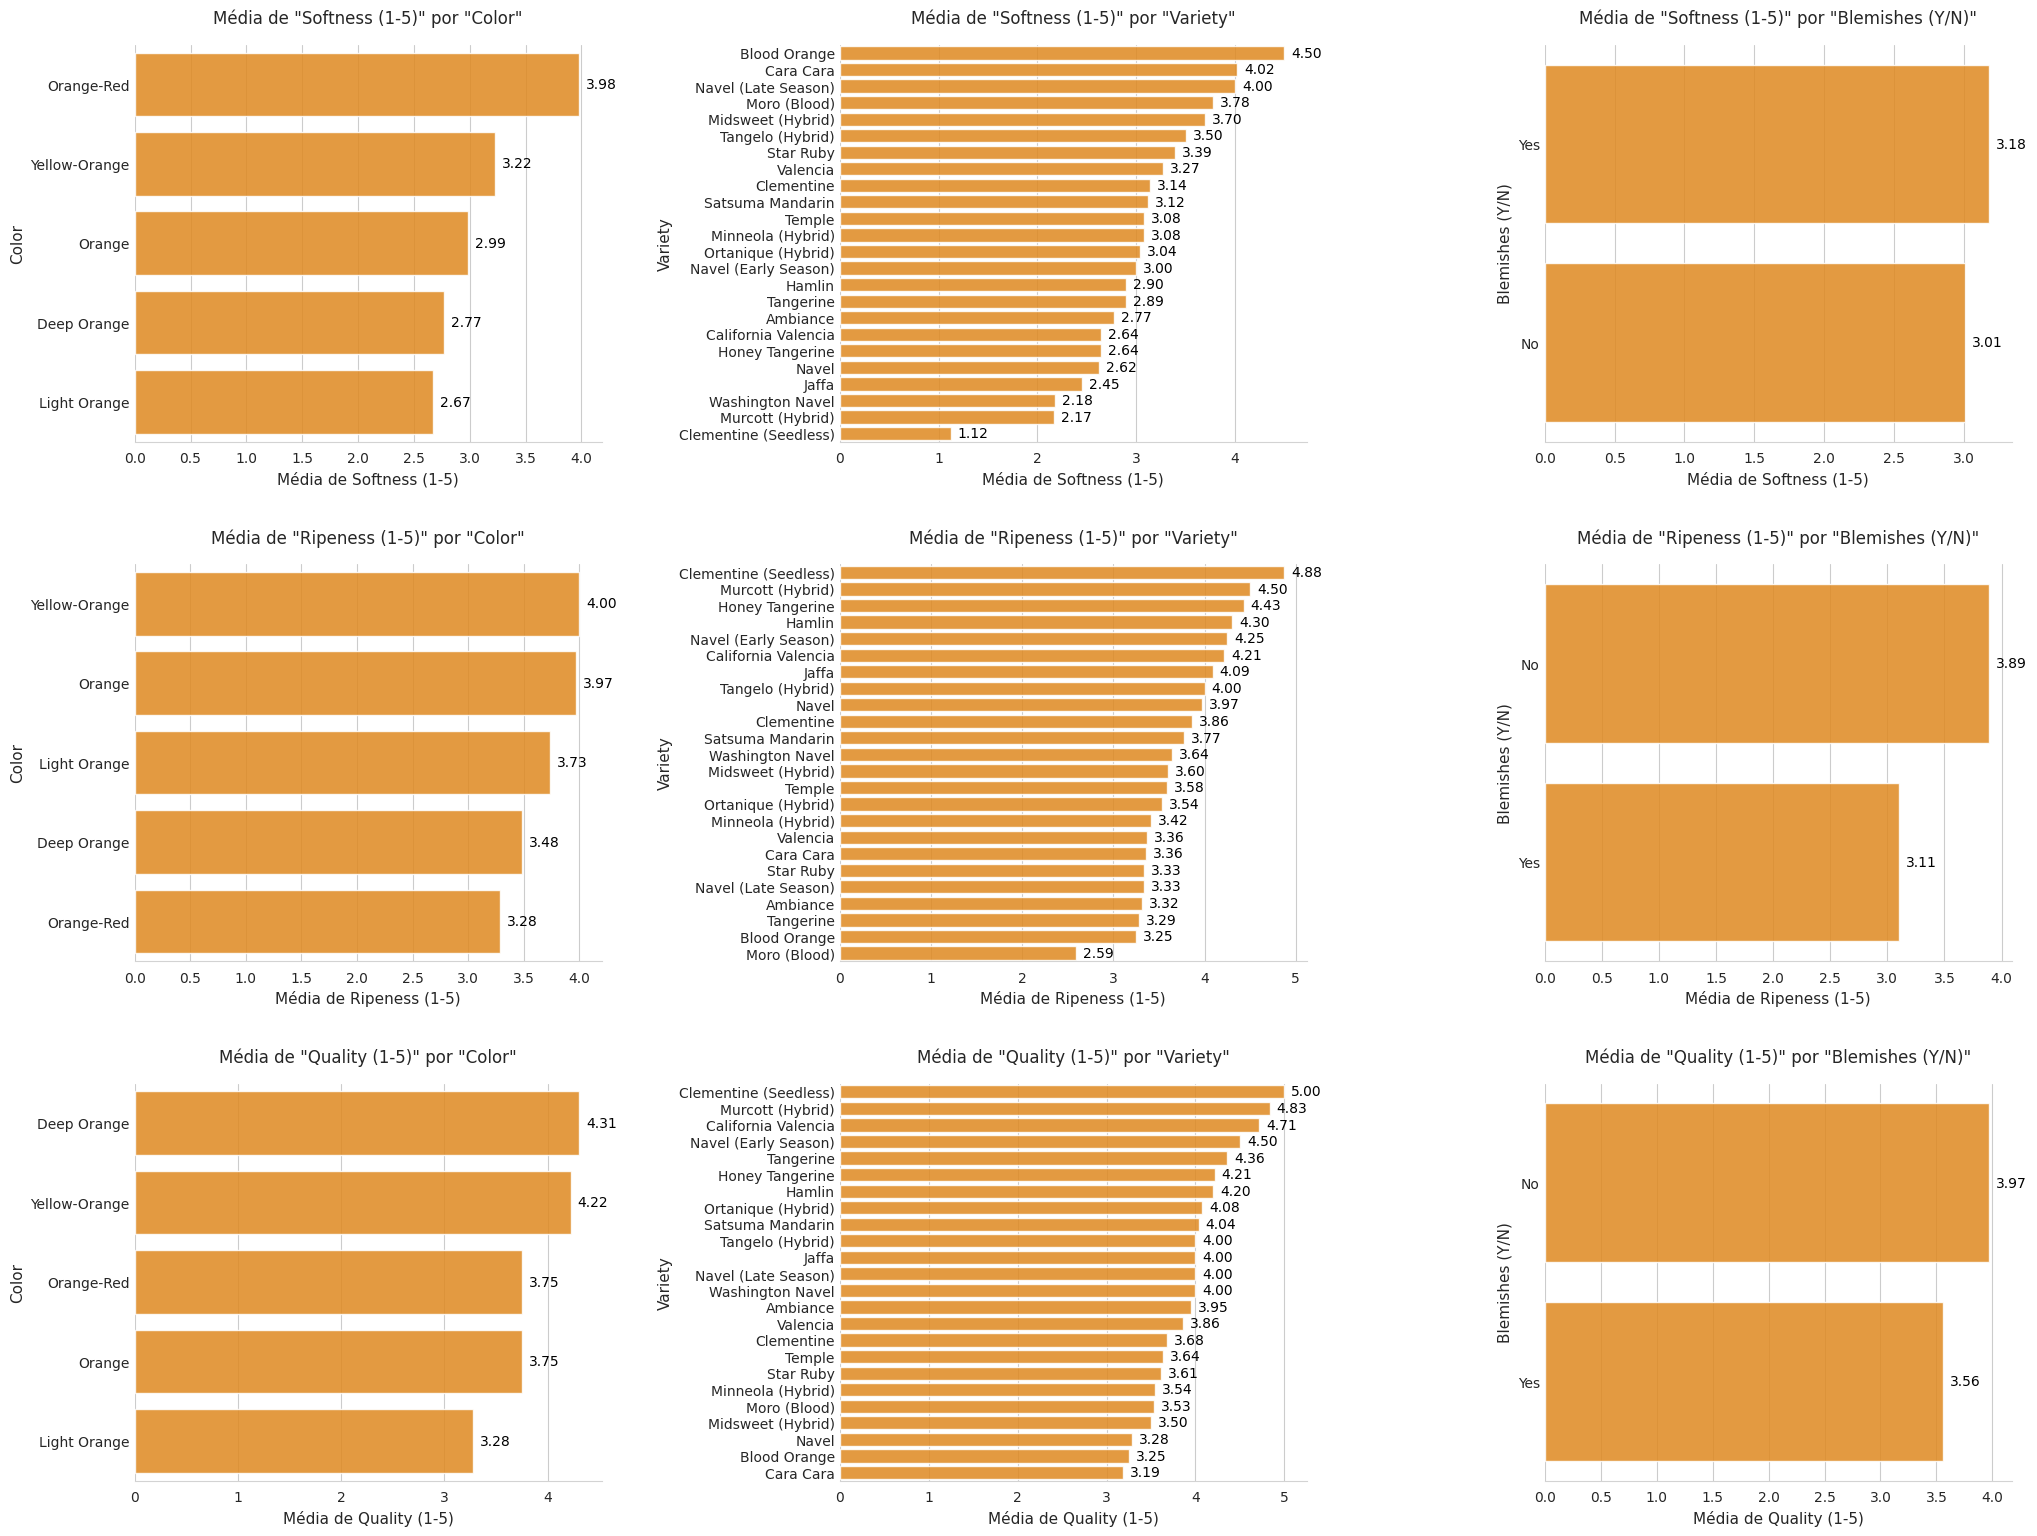

In [ ]:
n_rows = len(ordinais)
n_cols = len(nominais)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(21, 16))

for i, ordinal_var in enumerate(ordinais):
    for j, nominal_var in enumerate(nominais):

        ax = axes[i, j]
        order = df.groupby(nominal_var)[ordinal_var].mean().sort_values(ascending=False).index

        sns.barplot(
            x=ordinal_var,
            y=nominal_var,
            data=df,
            color="darkorange",
            ax=ax,
            order=order,
            alpha=0.85,
            errorbar=None
        )

        ax.bar_label(ax.containers[0], fmt="%.2f", color="black", label_type="edge", padding=5)

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_color("lightgray")
        ax.spines["left"].set_visible(False)

        ax.set_title(f'Média de "{ordinal_var}" por "{nominal_var}"', fontsize=12, pad=15)
        ax.set_ylabel(nominal_var, fontsize=11)
        ax.set_xlabel(f'Média de {ordinal_var}', fontsize=11)

        ax.tick_params(axis='y', length=0)

plt.tight_layout(pad=3.0)
plt.show()

Variável: **Softness (1-5)**

- **Por Color**:  
  A cor **"Orange-Red"** está associada à **maior maciez** (≈3.98).  
  Cores mais claras (**"Light Orange"**) tendem a estar associadas à **menor maciez** (≈2.67).

- **Por Variety**:  
  **Blood Orange** e **Cara Cara** são as variedades com frutas mais macias (4.5+).  
  **Clementine (Seedless)** e **Washington Navel** têm frutas menos macias (<2.5).

- **Por Blemishes (Y/N)**:  
  Frutas **com defeitos visíveis (Yes)** são um pouco **mais macias** (≈3.18 vs 3.01), mas a diferença é pequena.

Frutas de cor avermelhada e algumas variedades específicas são associadas a maior maciez.  
Além disso, frutas mais macias tendem a apresentar mais defeitos.

---

Variável: **Ripeness (1-5)**

- **Por Color**:  
  Cor **Yellow-Orange** associada à **maior maturação** (≈4.0).  
  Cor **Orange-Red** associada à **menor maturação** (≈3.28).

- **Por Variety**:  
  **Clementine (Seedless)**, **Murcott** e **Navel Early Season** têm as maiores médias de maturação (≈4.8).  
  **Blood Orange** e **Moro (Blood)** são menos maduros (≈2.6).

- **Por Blemishes (Y/N)**:  
  Frutas **sem defeitos (No)** são **mais maduras** (≈3.89 vs 3.11).

Frutas mais maduras tendem a não apresentar defeitos e estão associadas a variedades específicas e cores mais amareladas/claras.

---

Variável: **Quality (1-5)**

- **Por Color**:  
  **Deep Orange** e **Yellow-Orange** apresentam **maior qualidade** (≈4.22–4.31).  
  **Light Orange** e **Orange-Red** têm **menor qualidade** (≈3.28–3.75).

- **Por Variety**:  
  **Clementine (Seedless)**, **Murcott** e **California Valencia** têm as frutas com **maior qualidade** (≈4.8).  
  **Blood Orange**, **Moro (Blood)** e **Cara Cara** têm **menor qualidade** (≈3.2–3.5).

- **Por Blemishes (Y/N)**:  
  Frutas **sem defeitos (No)** têm **qualidade superior** (≈3.97 vs 3.56).

Frutas **sem manchas**, com cores como **"Deep Orange"** e de determinadas variedades (**Clementine, Murcott**) são percebidas como de **maior qualidade**.

---


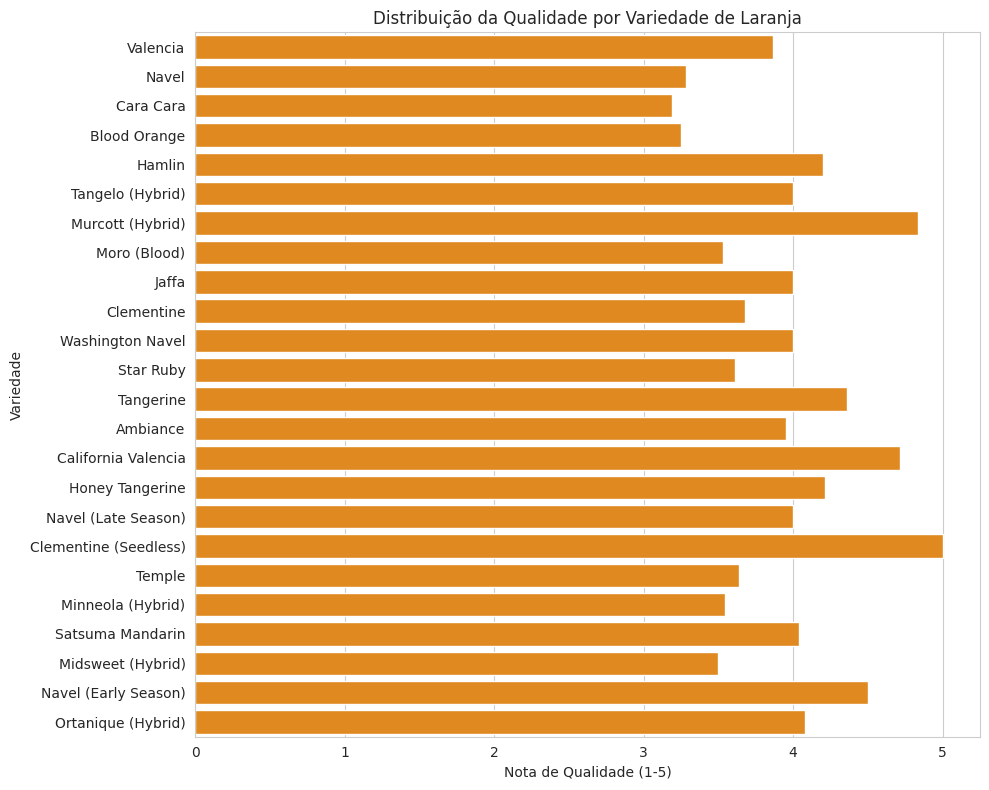

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Quality (1-5)',
    y='Variety',
    data=df,
    color="darkorange",
    errorbar=None

)
plt.title('Distribuição da Qualidade por Variedade de Laranja')
plt.xlabel('Nota de Qualidade (1-5)')
plt.ylabel('Variedade')
plt.tight_layout()
plt.show()

#### Ordinal vs Ordinal

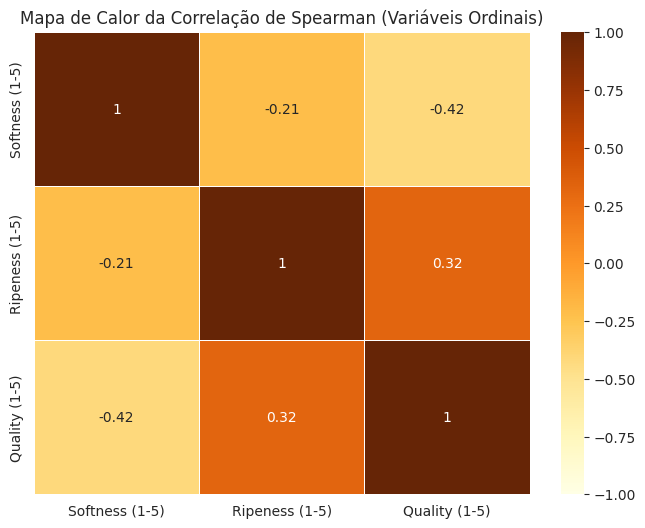

In [ ]:
matriz_corr_spearman = df[ordinais].corr(method='spearman')


plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_corr_spearman,
    annot=True,
    cmap='YlOrBr',
    linewidths=.5,
    vmin=-1, vmax=1
)
plt.title('Mapa de Calor da Correlação de Spearman (Variáveis Ordinais)')
plt.show()

Há uma **associação positiva** entre **maturação** e **qualidade**, o que é coerente com a ideia de que frutas bem maduras são mais agradáveis.

Por outro lado, o aumento da **maciez** parece estar negativamente associado à **qualidade**, sugerindo que frutas muito macias são percebidas como de pior **qualidade** (possivelmente por estarem passadas).

A relação entre **maciez** e **maturação** é fraca, mas negativa, o que pode indicar que a **maciez** não aumenta necessariamente com a **maturação** — talvez ela aumente só até certo ponto e depois caia.

## Análise multivariada

### Correlações e Relações Internas


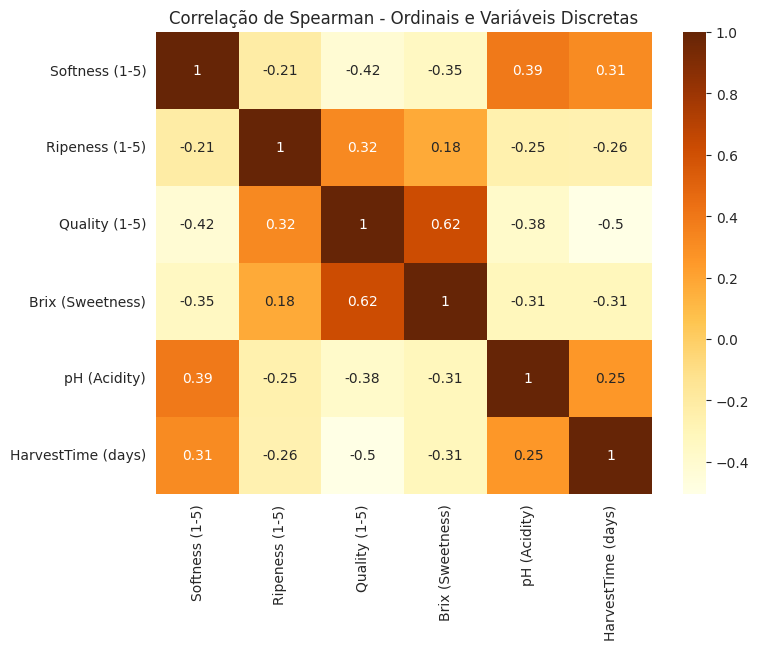

In [ ]:
ordinais_discretas = df[['Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)', 'Brix (Sweetness)', 'pH (Acidity)', 'HarvestTime (days)']]
corr = ordinais_discretas.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlOrBr')
plt.title("Correlação de Spearman - Ordinais e Variáveis Discretas")
plt.show()

---
A matriz de correlação de Spearman apresentada mostra como variáveis ordinais e discretas relacionadas às características físicas, químicas e sensoriais de frutas estão associadas entre si. Algumas relações se destacam.

A variável **Quality (1-5)** apresenta uma forte correlação positiva com **Brix (Sweetness)** (0.62), indicando que frutas mais doces tendem a ser percebidas como de maior qualidade. Por outro lado, a qualidade apresenta correlação negativa com **Softness (1-5)** (-0.42), **pH (Acidity)** (-0.38) e principalmente com **HarvestTime (days)** (-0.50), sugerindo que frutas mais macias, menos ácidas e colhidas tardiamente são vistas como de menor qualidade.

A **Softness (1-5)** também apresenta correlações interessantes. Ela está negativamente associada à **Quality** e à **Brix**, indicando que frutas mais macias tendem a ser menos doces e de menor qualidade. No entanto, a maciez se correlaciona positivamente com o **pH (0.39)** e com o **HarvestTime (0.31)**, o que sugere que frutas colhidas mais tarde se tornam mais macias e menos ácidas.

A variável **Ripeness (1-5)** mostra uma correlação positiva com **Quality (0.32)** e uma leve correlação com **Brix (0.18)**, indicando que o amadurecimento está ligado à qualidade e doçura, ainda que de forma mais moderada. Contudo, a maturação apresenta correlações negativas com o **pH (-0.25)** e com o **HarvestTime (-0.26)**, o que pode indicar que frutas colhidas mais cedo amadurecem de forma mais acentuada ou são percebidas como mais maduras no ponto de colheita ideal.

Já o **pH (Acidity)** mostra correlação negativa com a **Quality (-0.38)**, **Ripeness (-0.25)** e **Brix (-0.31)**, o que sugere que frutas mais ácidas tendem a ser menos doces, menos maduras e de menor qualidade sensorial. Em contrapartida, o pH se correlaciona positivamente com a maciez.

Por fim, o **HarvestTime (days)** se correlaciona negativamente com **Quality (-0.50)**, **Brix (-0.31)** e **Ripeness (-0.26)**, reforçando que quanto mais tempo a fruta permanece no pé, menor tende a ser sua doçura, maturação percebida e qualidade final. Ainda assim, apresenta correlação positiva com **Softness (0.31)** e **pH (0.25)**, sugerindo que frutas colhidas mais tardiamente são mais macias e menos ácidas.

Em resumo, a matriz indica que colheitas feitas no ponto certo de maturação maximizam a qualidade sensorial, a doçura e o equilíbrio da acidez, sendo fundamentais para garantir melhores frutos.

---

### Análise de Componentes Principais

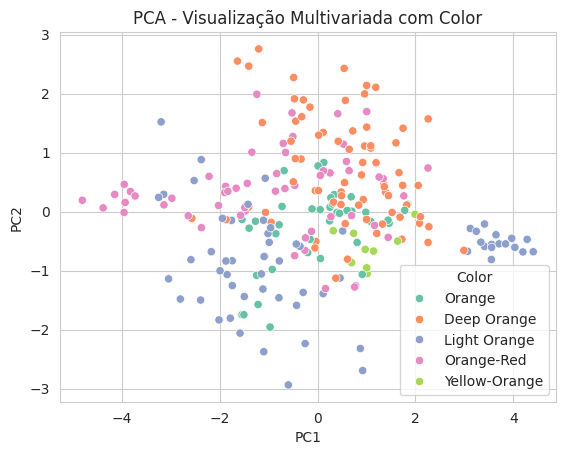

In [ ]:
X = df[['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'HarvestTime (days)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_pca['Color'] = df['Color']
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Color', palette='Set2')
plt.title('PCA - Visualização Multivariada com Color')
plt.show()

A figura acima apresenta a **Análise de Componentes Principais (PCA)** aplicada às variáveis quantitativas do conjunto de dados, com o objetivo de reduzir a dimensionalidade e facilitar a visualização da estrutura dos dados. Os pontos no gráfico representam observações (frutas), e suas posições são determinadas pelas duas primeiras componentes principais (PC1 e PC2), que concentram a maior parte da variância dos dados originais.

A coloração dos pontos representa a variável **Color**, uma variável qualitativa do tipo **nominal**, indicando diferentes tonalidades da casca das frutas: `Orange`, `Deep Orange`, `Light Orange`, `Orange-Red` e `Yellow-Orange`.


A projeção das observações no plano PC1 x PC2 sugere uma certa **separação parcial entre grupos de cores**, ainda que com **sobreposição considerável** entre algumas categorias:

- As frutas da cor **Deep Orange** tendem a se concentrar na região superior direita do gráfico, indicando que essa coloração está associada a um padrão multivariado distinto.
- Frutas da cor **Light Orange** e **Orange-Red** mostram distribuição mais dispersa, mas ainda com agrupamentos visíveis em regiões distintas do espaço PCA.
- A cor **Yellow-Orange** se destaca por estar agrupada em torno da origem, sugerindo que essa tonalidade apresenta características médias em relação às variáveis originais.
- A tonalidade **Orange** está presente em diversas regiões, indicando variabilidade interna ou que essa cor não está fortemente associada a um padrão específico nos dados.

Considerações

- A análise sugere que a variável **Color**, apesar de nominal, pode estar relacionada com padrões multivariados detectáveis pelas componentes principais.
- Isso pode indicar que a coloração da fruta está associada, direta ou indiretamente, a características como teor de açúcar, pH, maciez, entre outras.
- No entanto, como há sobreposição entre os grupos, a cor isoladamente **não é suficiente para uma classificação perfeita**, mas pode ser um **indicador auxiliar relevante** em modelos preditivos ou de agrupamento.



### Clustering

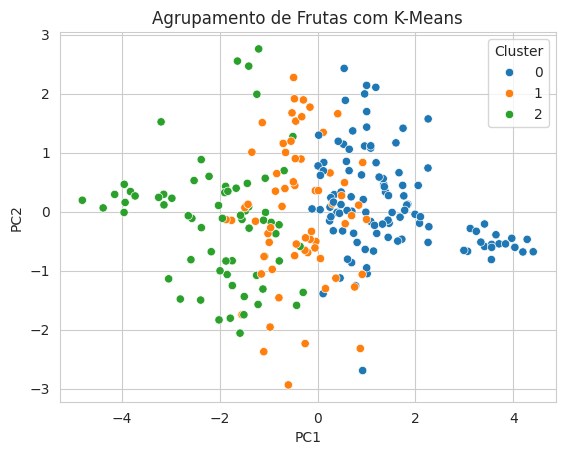

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=components[:,0], y=components[:,1], hue=df['Cluster'], palette='tab10')
plt.title('Agrupamento de Frutas com K-Means')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

Foram identificados **3 agrupamentos principais**:

- **Cluster 0 (azul)**: Agrupa a maioria dos pontos concentrados no lado direito do gráfico (valores mais altos de PC1), sugerindo que essas frutas compartilham um padrão comum de características, possivelmente relacionadas a maior acidez, menor doçura ou outras métricas.
  
- **Cluster 1 (laranja)**: Localiza-se mais ao centro do gráfico e parece agir como uma transição entre os dois extremos, o que pode indicar frutas com características intermediárias em relação às variáveis originais.

- **Cluster 2 (verde)**: Agrupa frutas localizadas no lado esquerdo (valores negativos de PC1), sugerindo um perfil distinto das frutas do Cluster 0, possivelmente associadas a menor acidez, maior teor de açúcar ou maturação diferenciada.

Interpretação

- O modelo de K-Means conseguiu formar **grupos visivelmente distintos** no espaço PCA, o que indica que os dados possuem **estrutura latente detectável**, mesmo sem rótulos previamente definidos.
- A separação visual reforça que há **padrões multivariados bem definidos** nas características medidas das frutas.
- Apesar da sobreposição em algumas regiões (especialmente entre os clusters 0 e 1), a estrutura geral indica que **o agrupamento não é aleatório**.


- Essa visualização é útil para avaliar **heterogeneidade entre as frutas** e pode servir como base para **análises mais profundas**, como:
  - Verificação da composição de cada cluster em relação às variáveis originais.
  - Comparação com variáveis qualitativas (ex: variedade, cor).
  - Identificação de **perfis ideais de qualidade** com base nos agrupamentos.

## Sumário de insights e hipóteses


---

### Padrões e Tendências Identificados

- O conjunto de dados contém **244 observações** e **11 variáveis**, classificadas em quantitativas contínuas, discretas e qualitativas nominais e ordinais.
- A cor predominante entre as laranjas é **Deep Orange** (75 amostras), e a variedade mais frequente é **Cara Cara**.
- A maioria das laranjas **não apresenta defeitos** visíveis (`Blemishes = No` em 149 casos).
- A distribuição das variáveis ordinais indica que a **maioria das frutas está nos níveis superiores de maciez, maturação e qualidade**:
  - Maciez mais comum: 3.0 e 4.0
  - Maturação: predominância no valor 5.0
  - Qualidade: predominância em 4.0 e 5.0
- O valor médio de **Brix (doçura)** é 10.90, **pH (acidez)** é 3.47 e o **tempo médio de colheita** é 15 dias.

---

### Dados Faltantes e Valores Extremos

- A análise inicial indica que **não há dados faltantes** no conjunto de dados (`df.isnull().sum()` retorna zero para todas as variáveis).
- Os **histogramas** gerados demonstram **distribuições simétricas e plausíveis** para as variáveis quantitativas.
- A inspeção por **boxplots** não revelou a presença de **outliers evidentes**, sugerindo que os dados estão bem distribuídos.

---

### Correlações e Associações Relevantes

- A matriz de correlação de **Spearman** revelou:
  - **Qualidade** fortemente associada à **doçura (Brix)** (r = 0.62)
  - **Quality** correlaciona-se negativamente com `Softness` (-0.42), `pH` (-0.38) e `HarvestTime` (-0.50)
  - **Softness** se correlaciona positivamente com `pH` (0.39), sugerindo que frutas mais macias tendem a ser menos ácidas
- A **cor da fruta (Color)** apresenta associação visual com os componentes principais (PCA), sugerindo que aspectos visuais da fruta refletem características internas como qualidade ou maturação.

---


### Agrupamentos

- O modelo **K-Means** (k=3) formou **três grupos distintos** com base nas variáveis quantitativas reduzidas por PCA:
  - Cluster 0: predominância de frutas do lado direito do gráfico (maiores valores em PC1)
  - Cluster 1: região central (transição entre perfis)
  - Cluster 2: lado esquerdo (frutas com características distintas)
- Isso indica que há **padrões latentes bem definidos** nas amostras, com potencial para segmentações úteis em aplicações reais (qualidade, mercado, tipo de consumidor).

---

### Hipóteses Formuladas

1. Frutas mais doces (Brix ↑) tendem a ser avaliadas como de maior qualidade.
2. A colheita tardia está associada a menor qualidade, menor doçura e maior maciez.
3. A coloração externa da fruta (Color) pode ser um **indicador preditivo auxiliar** para classificar frutas quanto à maturação ou qualidade.
4. O agrupamento por K-Means evidencia a possibilidade de **segmentar frutas em perfis distintos de mercado**, mesmo sem uso de rótulos explícitos.
5. A ausência de defeitos visuais (blemishes) pode estar associada, indiretamente, a frutas mais bem avaliadas em qualidade sensorial.

---